# Homework 5
***

**Name**: HARISH NANDHAN SHANMUGAM

***

This assignment is due on Gradescope by **Friday March 14 at 5:00PM**. If you submit the assignment  by this deadline, you will receive 2 bonus points. If you need a little extra time, you may submit your work by **Monday March 17 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There are 3 total questions on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

## Problem 1 (15 points)

**PART A:** Prove that the adjusted $R^2$ is always less than $R^2$.

$$
\text{The formula for } R^2 \text{ is},
$$

$$
R^2 = 1 - \frac{SSE}{SST}
$$  

$$
\text{Adjusted } R^2 \text{ formula based on degrees of freedom},
$$

$$
R_{adj}^2 = 1 - \frac{SSE}{SST} \times \frac{n-1}{n-p-1}
$$

$$
 \frac{n-1}{n-p-1} \text{ is } \text{used to adjust the } R^2
$$

$$
 \text{where n is the no. of observations and p is the no. of features}
$$

$$
\text{if p is +ve (when there is features), then} \frac{n-1}{n-p-1} \text{ > 1}
$$

$$
\text{The numerator will be greater here so it will yield a positive value}
$$


$$
\text{If we multiply with } \frac{SSE}{SST} \text{ here,}
$$

$$
\frac{SSE}{SST} \times \frac{n-1}{n-p-1} > \frac{SSE}{SST}
$$

$$
\text{In } R_{adj}^2 \text{ we are subtracting a larger value compared to } R^2  
$$

$$
\text{So }, R_{adj}^2 < R^2
$$

$$
R_{adj}^2 = R^2 \text{ is true only when there are no features/predictors in the dataset}
$$


## Problem 2 Comparing Model Selection Techniques (45 points)

Recall again, the Amazon book data. The data consists of data on $n = 325$ books and includes measurements of:

- `aprice`: The price listed on Amazon (dollars)


- `lprice`: The book's list price (dollars)


- `weight`: The book's weight (ounces)


- `pages`: The number of pages in the book


- `height`: The book's height (inches)


- `width`: The book's width (inches)


- `thick`: The thickness of the book (inches)


- `cover`: Whether the book is a hard cover of paperback.


- And other variables...

We'll explore various models to predict `aprice`. But first, we'll repeat the data cleaning from our lesson on t-tests. We'll also split the data into a training set and a test/validation set.

In [1]:
# You may either install the "car" package, or import the "vif_function.r" script
# in order to have a usable vif() function that will be needed later on in this problem.
# Uncomment the one that you need prior to executing this cell.

# install.packages("car")
install.packages("corrplot")
library(ggplot2)
# library(car) #for the vif() function
library(corrplot)
source("vif_function.r")

amazon = read.csv(url(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/amazon.txt")), sep = "\t")
names(amazon)
df = data.frame(aprice = amazon$Amazon.Price, lprice = as.numeric(amazon$List.Price),
                pages = amazon$NumPages, width = amazon$Width, weight = amazon$Weight..oz,
                height = amazon$Height, thick = amazon$Thick, cover = amazon$Hard..Paper)

#cleaning the data, as was done in our lesson on t-tests
df$weight[which(is.na(df$weight))] = mean(df$weight, na.rm = TRUE)
df$pages[which(is.na(df$pages))] = mean(df$pages, na.rm = TRUE)
df$height[which(is.na(df$height))] = mean(df$height, na.rm = TRUE)
df$width[which(is.na(df$width))] = mean(df$width, na.rm = TRUE)
df$thick[which(is.na(df$thick))] = mean(df$thick, na.rm = TRUE)
df = df[-205,]

#training and test set
set.seed(11111)
n = floor(0.8 * nrow(df)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sample indicies to be included in the training set

train = df[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")  #check the dimensions


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



[1] "Title"        "Author"       "List.Price"   "Amazon.Price" "Hard..Paper" 
 [6] "NumPages"     "Publisher"    "Pub.year"     "ISBN.10"      "Height"      
[11] "Width"        "Thick"        "Weight..oz."

There are 259 rows and 8 columns in the training set. There are 65 rows and 8 columns in the testing set.

Also, here are some pairwise correlations.

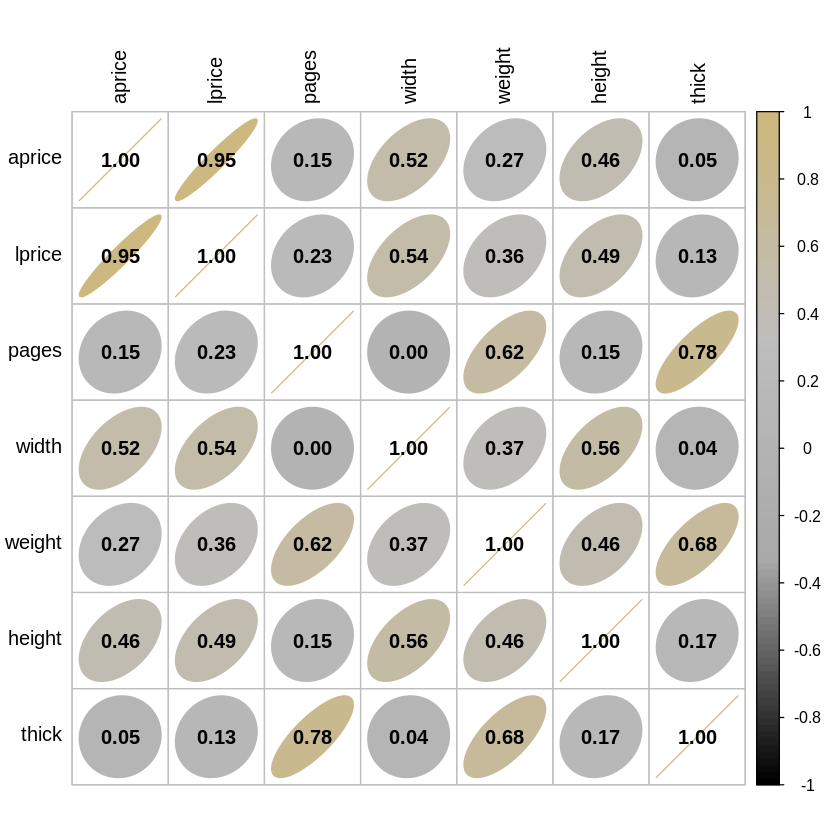

In [2]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(train[,-8]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

**PART A:** Fit a full model on the training dataset. Then, use the `update()` function to perform backward selection (let $\alpha_{crit} = 0.15$). At each step of backward selection, calculate the mean squared prediction error (MSPE) on the test set.

In [6]:
full_model <- lm(aprice ~ ., data = train)
summary(model_full)



Call:
lm(formula = aprice ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.1643  -1.8518  -0.4658   1.4417  21.3398 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.618859   2.975680  -1.888  0.06014 .  
lprice       0.862284   0.020365  42.342  < 2e-16 ***
pages       -0.003648   0.002843  -1.283  0.20055    
width        0.418865   0.376188   1.113  0.26658    
weight      -0.142183   0.060518  -2.349  0.01958 *  
height       0.148091   0.342243   0.433  0.66560    
thick        0.839125   1.397978   0.600  0.54889    
coverP       1.896960   0.678552   2.796  0.00558 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.827 on 251 degrees of freedom
Multiple R-squared:  0.9205,	Adjusted R-squared:  0.9183 
F-statistic: 415.1 on 7 and 251 DF,  p-value: < 2.2e-16


In [8]:
prediction_full_model = predict(full_model,test)
MSPE_full_model = with(test, sum((aprice- prediction_full_model)^2)/dim(test)[1])
MSPE_full_model


[1] 9.358554

Removing the height feature here since it has the highest p-value ie. p > 0.15

In [9]:
model_without_height = update(full_model,.~.-height)
summary(model_without_height)


Call:
lm(formula = aprice ~ lprice + pages + width + weight + thick + 
    cover, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0966  -1.8452  -0.4644   1.3964  21.2417 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.767100   2.227973  -2.140  0.03334 *  
lprice       0.864254   0.019817  43.611  < 2e-16 ***
pages       -0.003722   0.002833  -1.314  0.19013    
width        0.467540   0.358396   1.305  0.19324    
weight      -0.134970   0.058083  -2.324  0.02094 *  
thick        0.822290   1.395181   0.589  0.55614    
coverP       1.896906   0.677457   2.800  0.00551 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.821 on 252 degrees of freedom
Multiple R-squared:  0.9204,	Adjusted R-squared:  0.9185 
F-statistic: 485.8 on 6 and 252 DF,  p-value: < 2.2e-16


In [10]:
prediction_model_without_height = predict(model_without_height,test)
MSPE_model_without_height = with(test, sum((aprice- prediction_model_without_height)^2)/dim(test)[1])
MSPE_model_without_height

[1] 9.229814

Next, removing the predictor 'thick' p > 0.15

In [11]:
model_without_thick = update(model_without_height,.~.-thick)
summary(model_without_thick)


Call:
lm(formula = aprice ~ lprice + pages + width + weight + cover, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5062  -1.7863  -0.4443   1.3825  21.3897 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.223593   2.025551  -2.085  0.03806 *  
lprice       0.861978   0.019412  44.404  < 2e-16 ***
pages       -0.002567   0.002044  -1.256  0.21023    
width        0.440531   0.354996   1.241  0.21577    
weight      -0.122917   0.054294  -2.264  0.02443 *  
coverP       1.701771   0.590278   2.883  0.00428 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.816 on 253 degrees of freedom
Multiple R-squared:  0.9203,	Adjusted R-squared:  0.9187 
F-statistic: 584.4 on 5 and 253 DF,  p-value: < 2.2e-16


In [12]:
prediction_model_without_thick = predict(model_without_thick,test)
MSPE_model_without_thick = with(test, sum((aprice- prediction_model_without_thick)^2)/dim(test)[1])
MSPE_model_without_thick

[1] 8.555423

Next, removing the predictor 'width' p > 0.15

In [14]:
model_without_width = update(model_without_thick,.~.-width)
summary(model_without_width)


Call:
lm(formula = aprice ~ lprice + pages + weight + cover, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5460  -1.7807  -0.4809   1.2698  20.7516 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.918942   0.809428  -2.371  0.01850 *  
lprice       0.873961   0.016858  51.843  < 2e-16 ***
pages       -0.003391   0.001935  -1.753  0.08084 .  
weight      -0.100753   0.051327  -1.963  0.05074 .  
coverP       1.606029   0.585836   2.741  0.00655 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.82 on 254 degrees of freedom
Multiple R-squared:  0.9198,	Adjusted R-squared:  0.9186 
F-statistic: 728.5 on 4 and 254 DF,  p-value: < 2.2e-16


In [15]:
prediction_model_without_width = predict(model_without_width,test)
MSPE_model_without_width = with(test, sum((aprice- prediction_model_without_width)^2)/dim(test)[1])
MSPE_model_without_width

[1] 8.109727

In [16]:
best_model = model_without_width
summary(best_model)


Call:
lm(formula = aprice ~ lprice + pages + weight + cover, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5460  -1.7807  -0.4809   1.2698  20.7516 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.918942   0.809428  -2.371  0.01850 *  
lprice       0.873961   0.016858  51.843  < 2e-16 ***
pages       -0.003391   0.001935  -1.753  0.08084 .  
weight      -0.100753   0.051327  -1.963  0.05074 .  
coverP       1.606029   0.585836   2.741  0.00655 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.82 on 254 degrees of freedom
Multiple R-squared:  0.9198,	Adjusted R-squared:  0.9186 
F-statistic: 728.5 on 4 and 254 DF,  p-value: < 2.2e-16


now, after removing the width There is no p value > 0.15. So we stop the backward selection process now.

**PART B:** Check the standard diagnostic plots for this "best" model. Specifically, do you think this model satisfies the modeling assumptions?

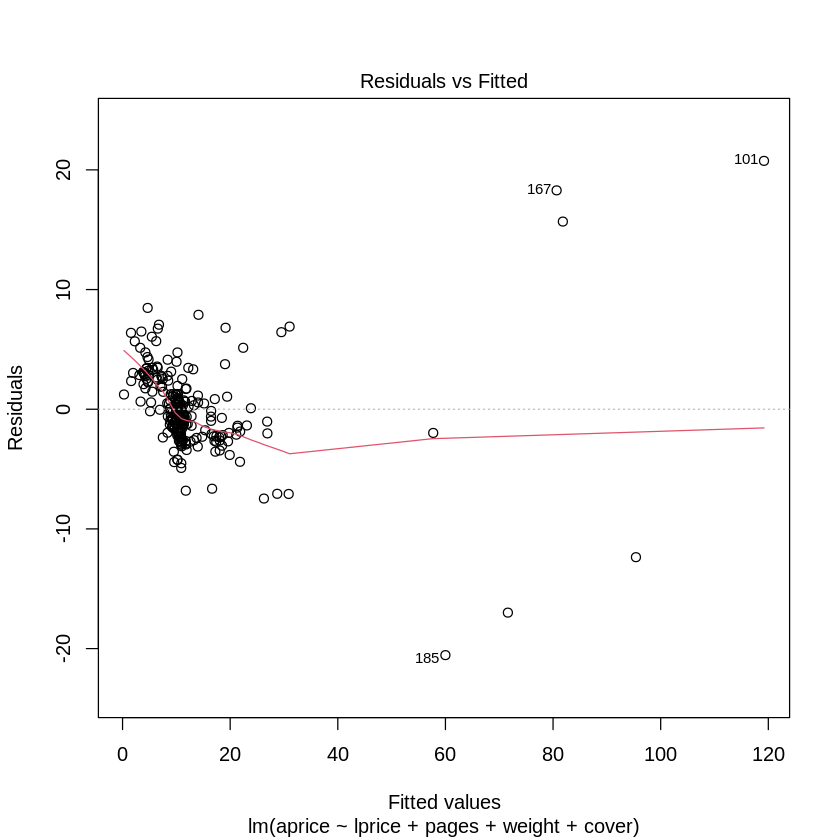

In [18]:
plot(best_model,1)

- Here this plot is not satisfying the constant variance assumption, it shows heteroscedasticity as the residuals are more clumsy for smaller fitted values and more spreaded out as the fitted values increases.
- Outliers are also present which will increase the variance,
- It won't satisfy the assumption of randomness (there is structural difference as well) because the line curves at one point.

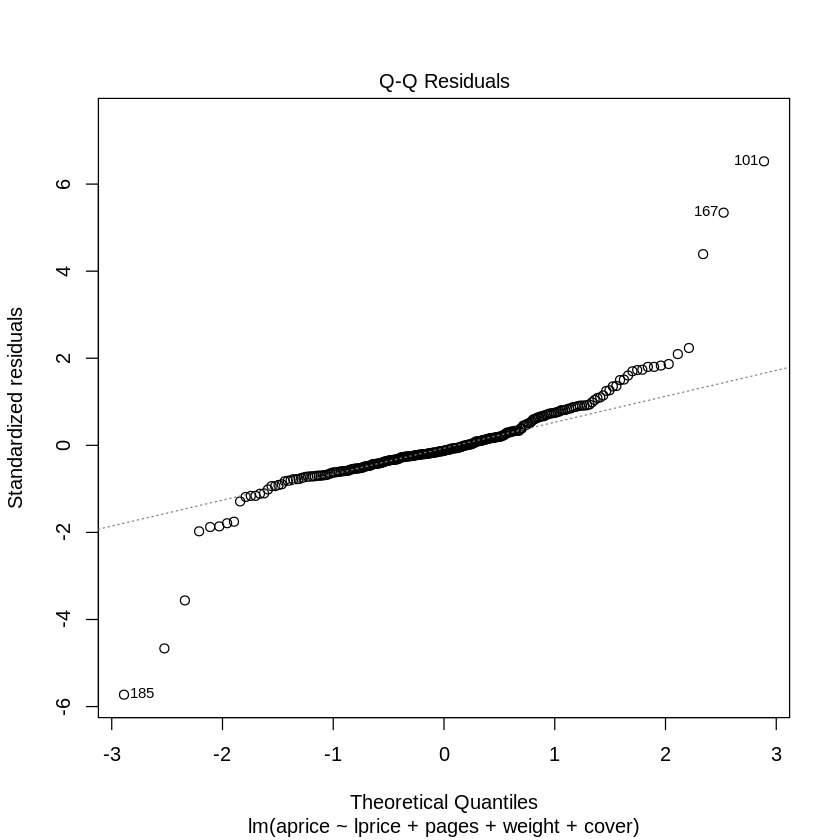

In [19]:
plot(best_model,2)

Q-Q plot shows that the residuals are not normal and this is a long tailed distribution may be due to the presence of outliers.

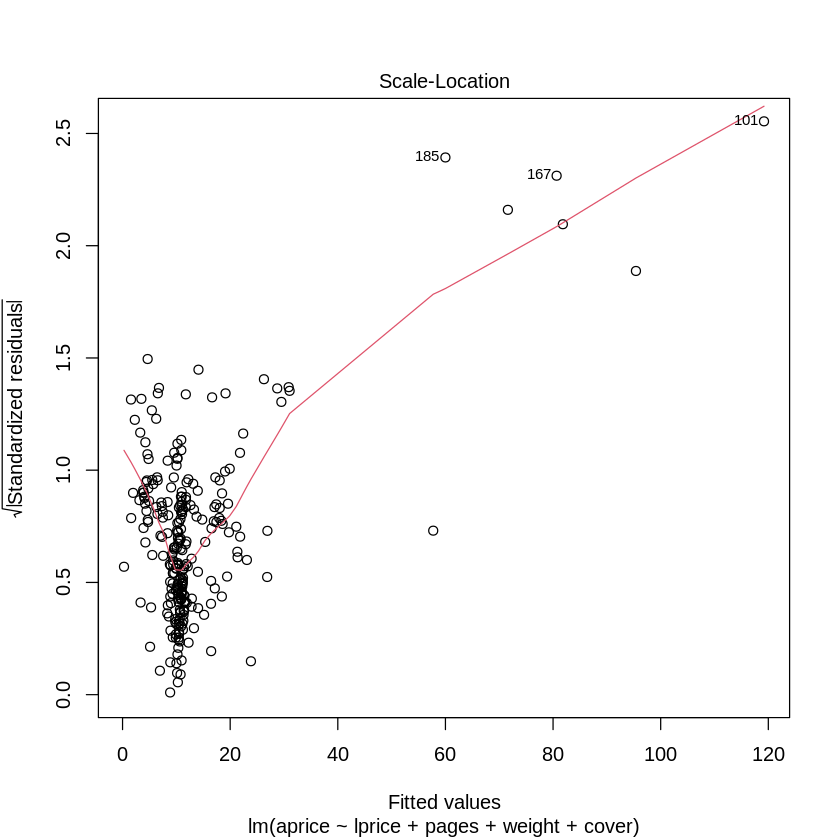

In [21]:
plot(best_model,3)

This standardized plot shows that it also violated the constant variance assumption, here also it represents the heteroscedasticity. the standardized residuals increases for the higher fitted values.

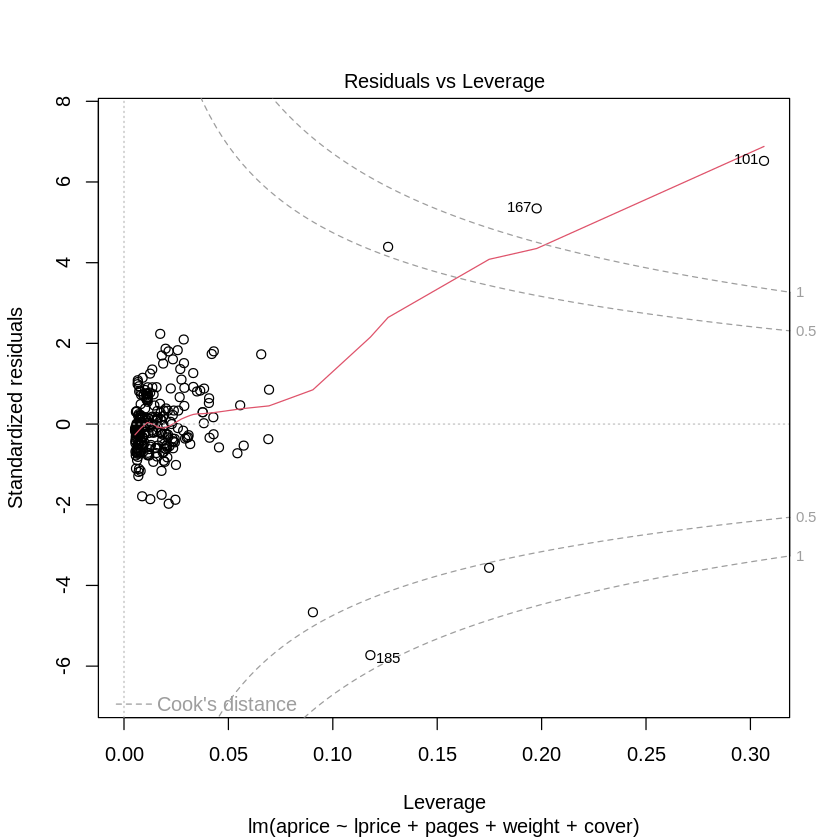

In [23]:
plot(best_model,5)

Residuals vs Leverage plot shows that
- points 167,101 are extremely influenced points ie.cook's distance > 1
- 3 points are highly influenced points ie.cook's distance > 0.5
- We have to remove these points

**PART C:** Compare the MSPE for each of the models you fit along the way as you performed the backward selection.  Using MSPE as a criterion, which model is best?

In [26]:
# Best model based on MSPE value
MSPE_values = c(
  MSPE_full_model,
  MSPE_model_without_height,
  MSPE_model_without_thick,
  MSPE_model_without_width
)


models <- c(
  "Full Model",
  "Model without Height",
  "Model without Thick",
  "Model without Width"
)

min_MSPE = MSPE_values[1]
best_model = models[1]

for (i in 2:length(MSPE_values)) {
  if (MSPE_values[i] < min_MSPE) {
    min_MSPE = MSPE_values[i]
    best_model = models[i]
  }
}

cat(best_model)
cat("\n")
cat(min_MSPE)

Model without Width
8.109727

The best model based on the MSPE value is also the 'Model without Width' [ie. with features lprice, pages, weight, cover]

**PART D:** Now, compute the best model of size  1 , the best model of size  2 , etc. up through the best model of size 7  (the full model). Then, among the remaining  7  models, compute the best model according the AIC, BIC, and  𝑅2𝑎 . Do the criteria pick out different models? Which model do you think is best? Justify your answer.

In [28]:
install.packages("leaps")
library(leaps)

n = dim(train)[1]
reg1 = regsubsets(aprice ~ lprice+weight+pages+height+width+thick+cover, data = train)
rs = summary(reg1)
rs$which

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,(Intercept),lprice,weight,pages,height,width,thick,coverP
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE
5,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE
6,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


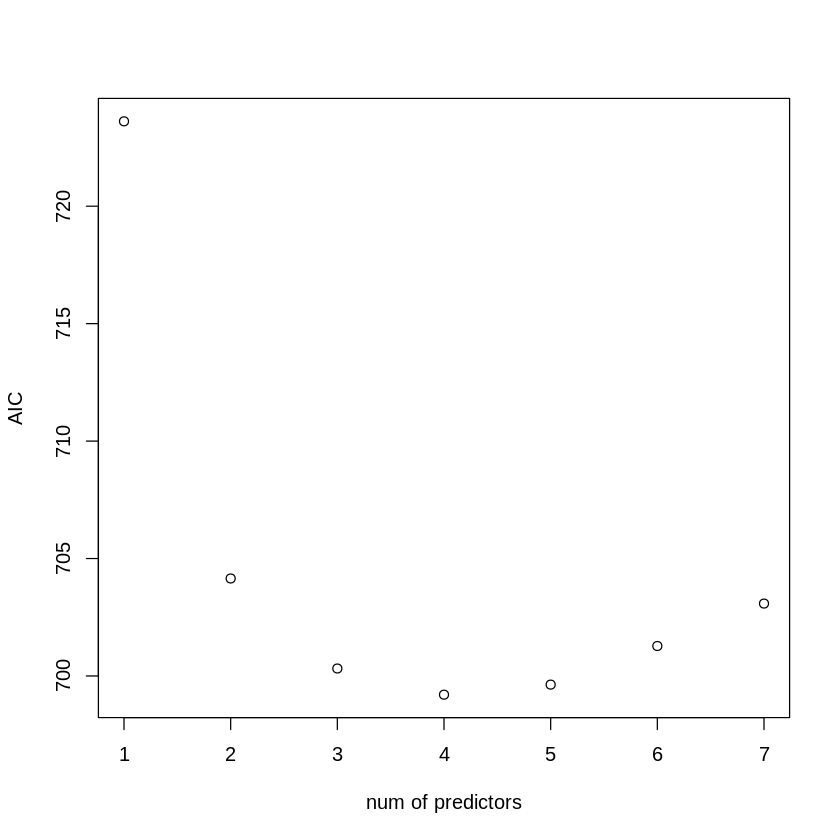

In [30]:
# Akaike information criterion
AIC = 2 * (2:8)+n*log(rs$rss/n)
plot(I(1:7),AIC,xlab = "num of predictors",ylab = "AIC")

AIC chooses the model: Model with 4 features [lprice,weight,pages,cover]

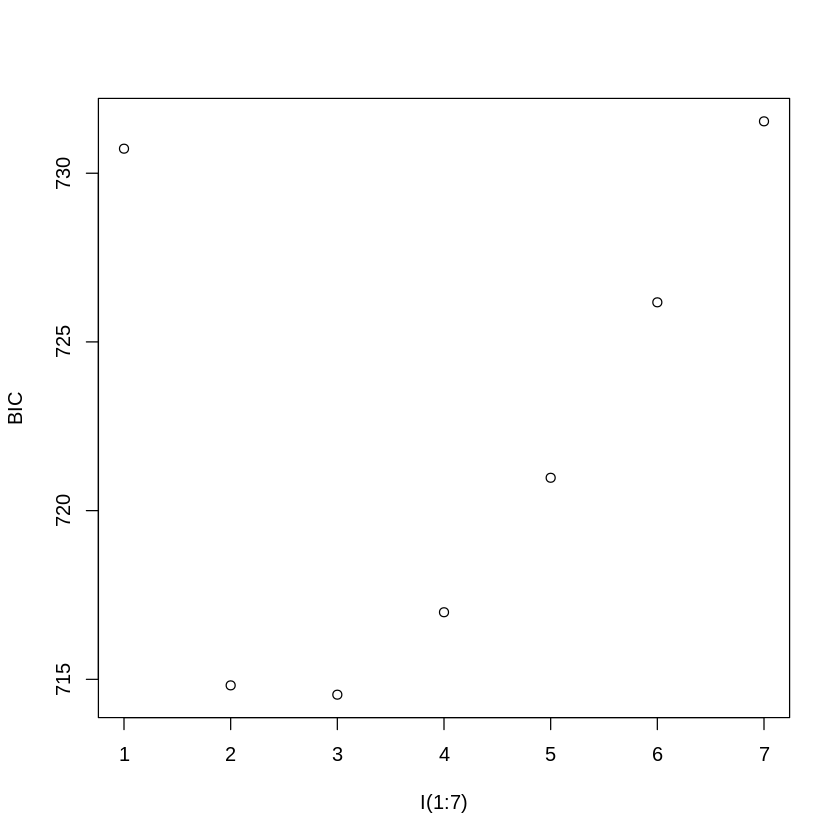

In [31]:
# Bayesian information criterion
BIC = log(n) * (2:8)+n*log(rs$rss/n)
plot(I(1:7),BIC)

BIC chooses the model: Model with 3 features [lprice,weight,cover]

        



        

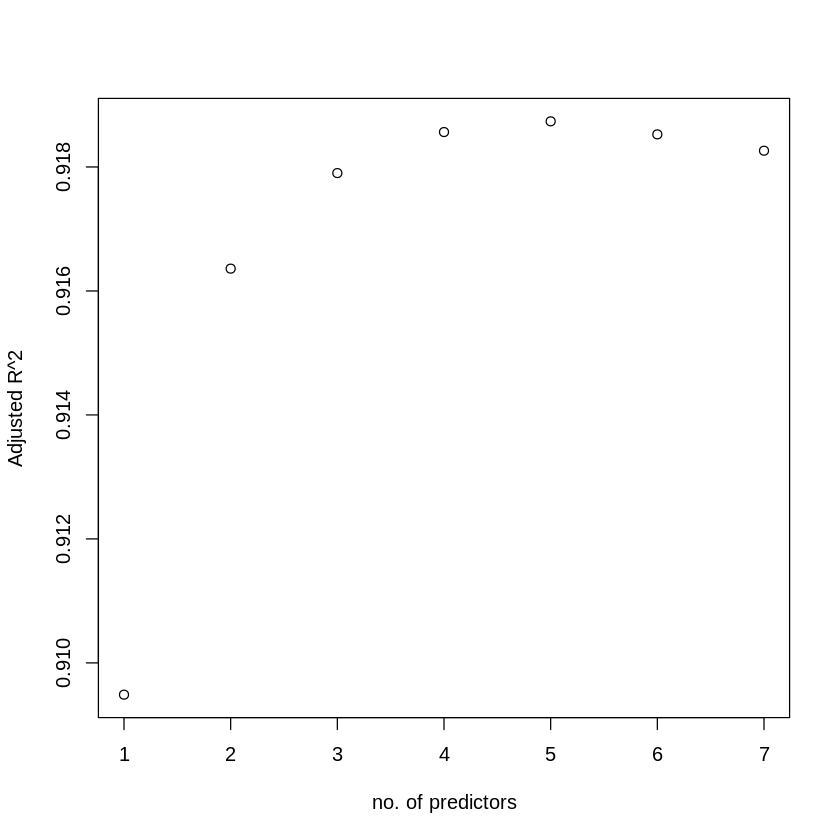

In [33]:
plot(I(1:7),rs$adjr2,xlab="no. of predictors", ylab="Adjusted R^2")

$R^2_a$ chooses the model: Model with 5 features [lprice,weight,pages,width,cover]

- All the three criteria gave out different models as the best model.
- From this if we were to choose the best model, then I'll go with the Model with three features because it is simple without many complex features so I will get the generalized prediction rather than getting an overfit model and also BIC penalizes the features more than the AIC so it will lead to a generalized model.


**PART E:** Compute the MSPE for each of the best models of size $1$, the best model of size $2$, etc. up through the best model of size $7$ (the full model). Which model is best according to this metric? Is this the same model that was selected by MSPE in part B.1 (c)?

You can either fit seven separate models **OR** automate this process in a function with a loop. If you choose to use a loop, consider the following:

1. The function should take in the training set, the test set, and the summary of your `regsubsets()` object (what we called `rs` in class).

2. The function should contain a loop. At step i = 1,...,p of the loop, you should:
    - select the training set model matrix corresponding the the best model of size i. You can do this using the logicals in the table given by `rs$which`.
    
    - fit the regression with the selected model matrix
    
    - select the test set matrix, xstar, of correct size i = 1,...,p. Again, you can do this using the logicals in the table given by `rs$which`.
    
    - compute the predicted value for the selected xstar
    
    - compute the MSPE

In [51]:
MSPE<- function(train,test,rs){
    for(i in (1:7)){
        features = rs$which[i,]
        feature_names = names(features[features == TRUE])
        feature_names = gsub("coverP", "cover", feature_names)
        feature_names = feature_names[feature_names!="(Intercept)"]
        model = lm(as.formula(paste("aprice~" ,paste(feature_names , collapse = "+"))),data=train)

        test_selected = test[,feature_names,drop = FALSE]
        test_selected = as.data.frame(test_selected)
        pred = predict(model,test_selected)
        MSPE = sum((test$aprice- pred)^2/dim(test)[1])
        print(paste("MSPE of model with ",i," features:",MSPE))
        }
    }

MSPE(train,test,rs)

[1] "MSPE of model with  1  features: 10.6100356384202"
[1] "MSPE of model with  2  features: 9.76521035710534"
[1] "MSPE of model with  3  features: 8.70326337153482"
[1] "MSPE of model with  4  features: 8.10972675716675"
[1] "MSPE of model with  5  features: 8.55542268797405"
[1] "MSPE of model with  6  features: 9.22981436292423"
[1] "MSPE of model with  7  features: 9.35855427918571"


- MSPE of model with 4 features is the best model with MSPE value of 8.10972675716675
- This is the same model that we chose in part b.1 c) ie. model after removing three features: height, thick and width

**PART F:** Compute the variance inflation factor for the models selected by AIC, BIC, MSPE, and $R_a^2$. Do any of these models show evidence of collinearity?

In [36]:
model_AIC = lm(aprice ~ lprice+weight+pages+cover, data=train)
vif(model_AIC)

lprice   weight    pages    cover 
1.154429 2.017828 1.689293 1.179402

In [37]:
model_BIC = lm(aprice ~ lprice+weight+cover, data=train)
vif(model_BIC)

lprice   weight    cover 
1.153993 1.261089 1.124251

In [38]:
model_R2 = lm(aprice ~ lprice+weight+cover+pages+width, data=train)
vif(model_R2)

lprice   weight    cover    pages    width 
1.533993 2.262691 1.199901 1.888786 1.736615

After testing the variance inflation factor function with all the criteria, the vif value is less than 5 so there is no collinearity.

## Problem 3 Diagnosing and Correcting Non-Constant Variance (40 points)

Researchers at the National Institutes of Standards and Technology (NIST) collected [pipline data](https://rdrr.io/cran/faraway/man/pipeline.html) on ultrasonic measurements of the depth of defects in the Alaska pipeline in the field. The depths of the defects were then remeasured in the laboratory. The laboratory measurements are more accurate than the field measurements, but more time consuming and expensive. We want to develop a regression model for correcting the in field measurements.

**PART A:** Fit a regression model where `Lab` is the response and `Field` is the predictor and save this model as `lmodPipeline`. Check for non-constant variance. Use the Pearson residuals. The Pearson residuals are a type of standardized residual. A plot of the Pearson residuals against the fitted values provides evidence of nonconstant variance. You can do this by specifying the "type" argument in your use of the resid function. Note whether or not you see non-constant variance in your plot.

In [46]:
# install.packages('faraway', repos='http://cran.us.r-project.org')
# library(faraway) #this package contains the pipeline data.

load('pipeline.rda')
head(pipeline)

,Field,Lab,Batch
,<int>,<dbl>,<fct>
1,18,20.2,1
2,38,56.0,1
3,15,12.5,1
4,20,21.2,1
5,18,15.5,1
6,36,39.0,1


In [47]:
model.pipeline = lm(Lab ~ Field, data = pipeline)
summary(model.pipeline)


Call:
lm(formula = Lab ~ Field, data = pipeline)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.985  -4.072  -1.431   2.504  24.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.96750    1.57479  -1.249    0.214    
Field        1.22297    0.04107  29.778   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.865 on 105 degrees of freedom
Multiple R-squared:  0.8941,	Adjusted R-squared:  0.8931 
F-statistic: 886.7 on 1 and 105 DF,  p-value: < 2.2e-16


1            2            3            4            5            6 
  0.15408345  11.49473217  -3.87701386  -1.29185168  -4.54591655  -3.05933270 
           7            8            9           10           11           12 
 -1.49185168 -12.42010565   2.53395922   4.37460794 -11.12010565  11.89473217 
          13           14           15           16           17           18 
  2.10956999   4.03782396  22.31912140   3.43782396  22.31912140   4.12298614 
          19           20           21           22           23           24 
 -6.84978129   9.28944576  -0.04591655  11.99473217  -4.27701386  -2.89185168 
          25           26           27           28           29           30 
 -4.54591655  -3.25933270  -2.99185168 -12.62010565   1.93395922   2.47460794 
          31           32           33           34           35           36 
-12.12010565  11.29473217   0.40956999   2.23782396  21.21912140   2.43782396 
          37           38           39           40           41           42 
 21.71912140   4.12298614  -7.84978129   2.62298614  12.21769973  -4.07701386 
          43           44           45           46           47           48 
 -1.64591655   0.01485640  -2.83636514  -3.99185168  -8.95120296  -3.88087860 
          49           50           51           52           53           54 
 -3.35933270  -4.68087860  -6.50526783   1.73782396  -8.05506770   1.23782396 
          55           56           57           58           59           60 
-21.98474334   4.36892127  -3.88087860  11.23538089  11.73538089  -0.93494347 
          61           62           63           64           65           66 
  2.29188883   5.92054307   1.73782396   6.32054307  -1.43107873   5.92440781 
          67           68           69           70           71           72 
 13.36363486   4.22054307   4.26892127   2.43395922   2.36079153  -2.99185168 
          73           74           75           76           77           78 
 -4.54591655  -3.33636514  -2.99185168  -7.00526783  -3.68087860  -3.64022988 
          79           80           81           82           83           84 
 -9.45120296  -8.21481924   2.43111589  -0.46217604   2.40956999  -0.09998142 
          85           86           87           88           89           90 
  0.15266178  -0.66746245   0.13924563  -4.32152732  -2.86604078  -8.29043001 
          91           92           93           94           95           96 
 -3.10668950   1.09188883  -3.94978129  -2.05933270   1.85266178  -2.57945693 
          97           98           99          100          101          102 
-11.82010565  -9.20668950  -5.80913257  24.33395922  -7.02681373  -2.23920847 
         103          104          105          106          107 
 -2.12152732  -5.13778681  -7.71868398  -3.47701386  -4.06604078

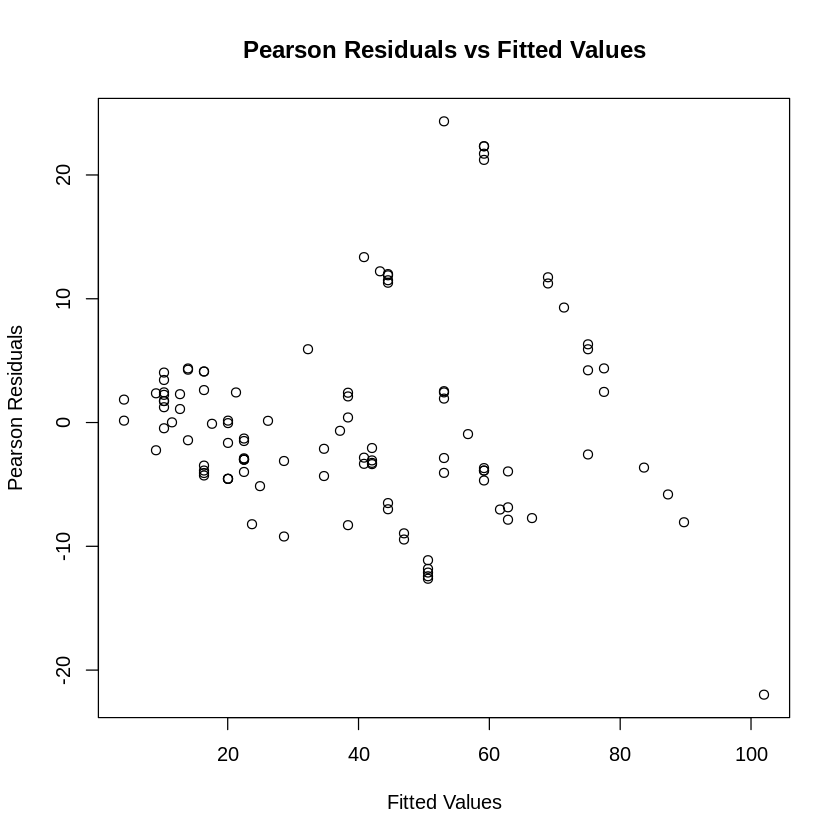

In [48]:
pearson_resid = resid(model.pipeline, type = "pearson")
pearson_resid
plot(fitted(model.pipeline),pearson_resid,
     main = "Pearson Residuals vs Fitted Values",
     xlab = "Fitted Values", ylab = "Pearson Residuals")

- it's showing Non constant variance : The residuals are not close together after the fitted values started increasing and not in a constant distance between each other (variance between the residuals increases as the fitted values increases).


**PART B:** Sometimes transforming the response and predictor helps in stabilizing variance. Find a transformation on Lab and/or Field so that in the transformed scale the relationship is approximately linear with constant variance. Restrict your choice of transformation to square root or log. Save your transformed variables as `pipeline$LabTransform` and `pipeline$FieldTransform`. Then, regress the transformed` Lab` variable (response) onto the transformed `Field` variable (predictor), and save this as `lmodTr`.

Check for non-constant variance in your transformed model using the same process from Part A. What do you notice?

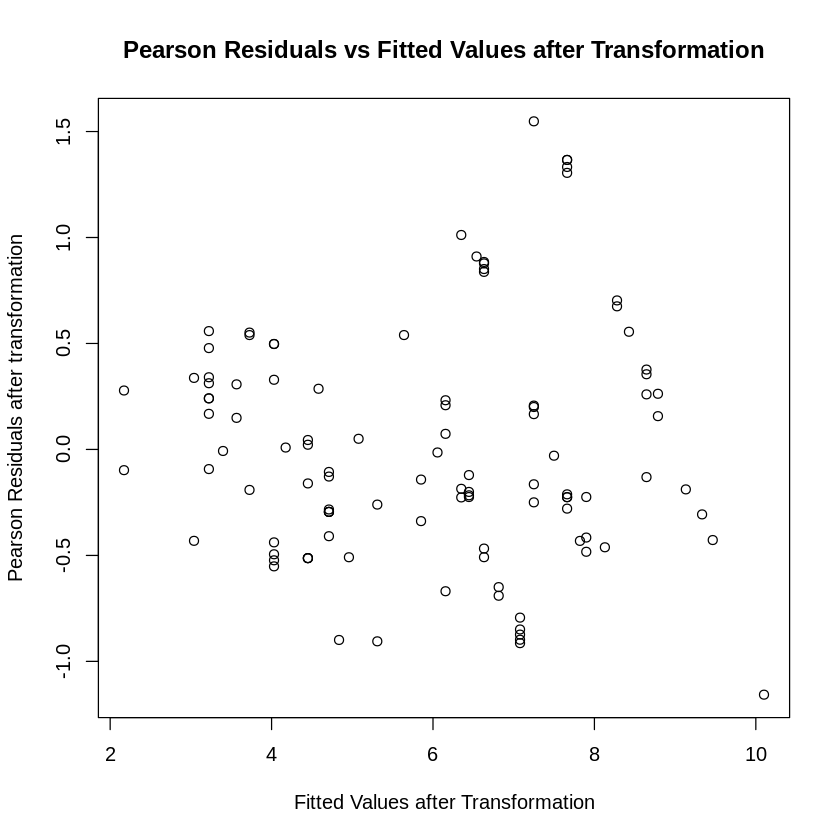

In [50]:
pipeline.lab.transformed = sqrt(pipeline$Lab)
pipeline.field.transform = sqrt(pipeline$Field)

model.pipeline.transformed = lm(pipeline.lab.transformed ~ pipeline.field.transform)
pearson_resid_transformed = resid(model.pipeline.transformed, type="pearson")
plot(fitted(model.pipeline.transformed), pearson_resid_transformed,
     main = "Pearson Residuals vs Fitted Values after Transformation",
     xlab = "Fitted Values after Transformation", ylab = "Pearson Residuals after transformation")

- After the square root transformation, the residuals are now more evenly distributed with slightly constant variance. this indicates that the square root tranformation played a significant role in correcting the non constant variance problem.
- But some outliers present in data is not changed even after applying this transformation.